# Gather Classification

In [2]:
import pandas as pd
import sourmash
import seaborn as sns
import matplotlib.pyplot as plt

### read in spillover dataset

In [3]:
spilloverdb = 'Spillover_dataset_Sept_22_2020.csv'
sp = pd.read_csv(spilloverdb)
sp.head()

/var/folders/pv/_f7m99kd33782sdc79lfqc300000gn/T/ipykernel_45464/3489051028.py:2: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  sp = pd.read_csv(spilloverdb)


,Column1,IndividualID,HostClass,HostOrder,HostFamily,HostGenus,HostSpecies,Virus,VirusSpecies,VirusGenus,...,WilsonNoDiets,ConservationStatus,TaxaGroup,HostGeography,LUS_new,LVSTD_DS,ResultPopDensity,PresenceDeforestation20,ProbUrbanExpan2030Cat,AgChangePA
0,1,NCB146845,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,2,NCB146846,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,3,NCB146847,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,4,NCB146848,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,5,NCB146849,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


## Matches against ICTV-VMR only

In [119]:
# g_csv = 'from-farm/spillover-x-vmr_MSL38_v1.dna-k31-sc1.fastmultigather.with_csv'
g_csv = 'from-farm/spillover-x-vmr_MSL38_v1.dna-k31-sc1.fastmultigather.with-lineages.csv'
m_csv = 'from-farm/spillover-x-vmr_MSL38_v1.dna-k31-sc1.manysearch.csv'

In [120]:
gDF = pd.read_csv(g_csv)
gDF.shape

(31998, 7)

In [121]:
mDF = pd.read_csv(m_csv)
mDF.shape

(38870, 8)

In [122]:
n_queries_matched_gather = gDF['query_name'].nunique()
n_refgenomes_matched_gather = gDF['match_name'].nunique()

n_queries_matched_manysearch = mDF['query_name'].nunique()
n_refgenomes_matched_manysearch = mDF['match_name'].nunique()

print('gather: # queries with gather match:',n_queries_matched_gather )
print('gather: # ref genomes with gather match:',n_refgenomes_matched_gather )
print('search: # queries with any match:',n_queries_matched_manysearch )
print('search: # ref genomes with any match:',n_refgenomes_matched_manysearch)

gather: # queries with gather match: 18235
gather: # ref genomes with gather match: 352
search: # queries with any match: 18235
search: # ref genomes with any match: 848


In [123]:
mDF['AccessionNumber'] = mDF['query_name'].str.split(' ', n=1, expand=True)[0]
mDF.head()

,query_name,query_md5,match_name,containment,intersect_hashes,match_md5,jaccard,max_containment,AccessionNumber
0,FJ944556 Cowpox virus,7ff2a3c66f4231a8f9f70642198fec59,GCF_000860085.1 Vaccinia virus,0.917526,178,NaN,NaN,NaN,FJ944556
1,FJ944556 Cowpox virus,7ff2a3c66f4231a8f9f70642198fec59,GCF_000857045.1 Monkeypox virus,0.458763,89,NaN,NaN,NaN,FJ944556
2,FJ944556 Cowpox virus,7ff2a3c66f4231a8f9f70642198fec59,GCF_000839185.1 Cowpox virus,0.298969,58,NaN,NaN,NaN,FJ944556
3,FJ944556 Cowpox virus,7ff2a3c66f4231a8f9f70642198fec59,GCF_000869985.1 Taterapox virus,0.247423,48,NaN,NaN,NaN,FJ944556
4,FJ944556 Cowpox virus,7ff2a3c66f4231a8f9f70642198fec59,GCF_000839105.1 Camelpox virus,0.242268,47,NaN,NaN,NaN,FJ944556


#### for now, let's output best matches

In [124]:
gictv_bestmatch = gDF.groupby('query_name').nth(0)

gictv_bestmatch.head()

,query_name,query_md5,match_name,match_md5,f_match_query,intersect_bp,lineage
0,AF291394 Simian foamy virus,f230c6d38d62a9ce50e9146716441cad,GCF_003032755.1 Central cimpanzee simian foamy...,20452cd78874c188610c452bbe28340e,0.001483,17,Riboviria;;Pararnavirae;;Artverviricota;;Revtr...
4,AJ627533 Simian foamy virus,f7a2737a887646c7abb990b2da57798e,GCF_003047575.1 Simian foamy virus Pongo pygma...,54cfc2dc568a60fcb12676b926285bb4,0.001250,14,Riboviria;;Pararnavirae;;Artverviricota;;Revtr...
5,AJ627555 Simian foamy virus,237f07c039ee70eb490f6c9e37f08ec3,GCF_000848485.1 Western chimpanzee simian foam...,07a080426bed4e2840c7c07bc915a8e0,0.009316,107,Riboviria;;Pararnavirae;;Artverviricota;;Revtr...
8,JF446291 Argentinian mammarenavirus,2a1a2dea1562abc8895ae5b34a785ebc,GCF_000856545.1 Argentinian mammarenavirus,d0f38387a4267e7c57b8aac012e2cfbe,0.018060,189,Riboviria;;Orthornavirae;;Negarnaviricota;Poly...
9,GU644915 Lyssavirus rabies,0f63e2b12898dce3c1a80a410d99bbea,GCF_000859625.1 Lyssavirus rabies,52e85a68f3a2513ccfd00b16c5f0ec64,0.000924,11,Riboviria;;Orthornavirae;;Negarnaviricota;Hapl...


In [125]:
gictv_bestmatch.shape

(18235, 7)

In [126]:
gictv_bestmatch.to_csv('spillover-x-vmr_MSL38_v1.dna-k31-sc1.fastmultigather.ictv-lineages.bestmatch.csv', index=False)

In [9]:
matched_accs = set(mDF['AccessionNumber'].tolist())

In [10]:
not_matched = sp[~sp['AccessionNumber'].isin(matched_accs)]
not_matched.shape

(17510, 55)

## Matches against GenBank 62k (includes ICTV VMR)

In [11]:
gc_csv = 'from-farm/spillover-x-genbank-2023-05-viral.dna-k31-sc1.fastmultigather.csv'
mc_csv = 'from-farm/spillover-x-genbank-2023-05-viral.dna-k31-sc-1.manysearch.csv'

In [12]:
gc = pd.read_csv(gc_csv)
mc = pd.read_csv(mc_csv)

In [13]:
n_queries_matched_gather = gc['query_name'].nunique()
n_refgenomes_matched_gather = gc['match_name'].nunique()

n_queries_matched_manysearch = mc['query_name'].nunique()
n_refgenomes_matched_manysearch = mc['match_name'].nunique()

print('gather: # queries with match:',n_queries_matched_gather )
print('gather: # ref genomes with match:',n_refgenomes_matched_gather )
print('search: # queries genomes with match:',n_queries_matched_manysearch )
print('search: # ref genomes with match:',n_refgenomes_matched_manysearch)

gather: # queries with match: 28173
gather: # ref genomes with match: 888
search: # queries genomes with match: 28042
search: # ref genomes with match: 3107


In [14]:
gc['AccessionNumber'] = gc['query_name'].str.split(' ', n=1, expand=True)[0]
mc['AccessionNumber'] = mc['query_name'].str.split(' ', n=1, expand=True)[0]

In [15]:
matched_accs_gb = set(gc['AccessionNumber'].tolist())

## Assess unmatched accessions

In [16]:
not_matched_gb = sp[~sp['AccessionNumber'].isin(matched_accs_gb)]
not_matched_gb.shape

(7572, 55)

In [77]:
not_matched_gb.head()

,Column1,IndividualID,HostClass,HostOrder,HostFamily,HostGenus,HostSpecies,Virus,VirusSpecies,VirusGenus,...,WilsonNoDiets,ConservationStatus,TaxaGroup,HostGeography,LUS_new,LVSTD_DS,ResultPopDensity,PresenceDeforestation20,ProbUrbanExpan2030Cat,AgChangePA
3,4,NCB146848,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,5,NCB146849,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
14,15,NCB146859,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
15,16,NCB146860,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
16,17,NCB146861,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [78]:
not_matched_gb['VirusSpecies'].nunique()

794

In [86]:
not_matched_gb['VirusFamily'].nunique()

19

In [87]:
not_matched_gb['VirusGenus'].nunique()

29

## merge in length to see if that is why we can't match?

In [34]:
dna_lengths = 'from-farm/2023-08-07-spillover.dna.lengths.csv'
dnaL = pd.read_csv(dna_lengths)
dnaL.rename(columns={'sequence_name': 'AccessionNumber'}, inplace=True)
dnaL.head()

,AccessionNumber,length
0,EU241637,490
1,EU241638,490
2,EU241639,490
3,EU241640,490
4,EU241641,372


In [80]:
not_matched_gb_len = pd.merge(not_matched_gb, dnaL, on='AccessionNumber', how='left')
not_matched_gb_len.shape

(7572, 56)

In [82]:
# View summary statistics
print(not_matched_gb_len['length'].describe())

count    5656.000000
mean      417.199788
std       205.835477
min        83.000000
25%       289.000000
50%       370.000000
75%       530.000000
max      4413.000000
Name: length, dtype: float64


In [90]:
not_matched_gb_len.columns

Index(['Column1', 'IndividualID', 'HostClass', 'HostOrder', 'HostFamily',
       'HostGenus', 'HostSpecies', 'Virus', 'VirusSpecies', 'VirusGenus',
       'VirusFamily', 'AccessionNumber', 'InterfaceP1', 'SampleType',
       'Latitude', 'Longitude', 'Country', 'DivergenceHumansMYA', 'DataSource',
       'SiteID', 'MYAgroup', 'Genome_General', 'Segmented', 'Envelope',
       'VirusHumans_Final', 'VirusTerrMamm_Final', 'VirusBirds_Final',
       'VirusOtherAnim_Final', 'PercentageHumanGroup',
       'PercentageTerrMammGroup', 'PercentageBirdsGroup',
       'PercentageOtherAnimGroup', 'PercentMoreOnehostGroup',
       'Epidemics_Final', 'Pandemic', 'PercentageHumanPathGroup',
       'SeverityDiseaseHumans', 'KnownMammal_TerrPathogenicity',
       'KnownBirdPathogenicity', 'KnownOtherAnimalPathogenicity',
       'Total_transmission', 'ChronicityHumans', 'HumanToHumanTransVirus',
       'AnimalToHuman', 'NoHabitats_total', 'WilsonNoDiets',
       'ConservationStatus', 'TaxaGroup', 'HostGeog

In [89]:
not_matched_gb_len[not_matched_gb_len['length'] >=1200]

,Column1,IndividualID,HostClass,HostOrder,HostFamily,HostGenus,HostSpecies,Virus,VirusSpecies,VirusGenus,...,ConservationStatus,TaxaGroup,HostGeography,LUS_new,LVSTD_DS,ResultPopDensity,PresenceDeforestation20,ProbUrbanExpan2030Cat,AgChangePA,length
8,75,NCB695390,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus alecto,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,LC,Terrestrial mammal,SemiGlobal,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
9,76,NCB695391,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus poliocephalus,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,VU,Terrestrial mammal,NationalLarge,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
10,77,NCB695392,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus scapulatus,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,LC,Terrestrial mammal,NationalLarge,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
11,78,NCB695393,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus alecto,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,LC,Terrestrial mammal,SemiGlobal,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
12,79,NCB695394,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus alecto,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,LC,Terrestrial mammal,SemiGlobal,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
13,80,NCB695395,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus poliocephalus,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,VU,Terrestrial mammal,NationalLarge,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
14,81,NCB695396,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus poliocephalus,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,VU,Terrestrial mammal,NationalLarge,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
15,84,NCB695399,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus poliocephalus,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,VU,Terrestrial mammal,NationalLarge,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2039.0
16,85,NCB695400,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus alecto,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,LC,Terrestrial mammal,SemiGlobal,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
17,87,NCB695402,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus alecto,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,LC,Terrestrial mammal,SemiGlobal,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0


In [88]:
not_matched_gb_len[not_matched_gb_len['length'] == 4413]['AccessionNumber']

7563    KJ641655
Name: AccessionNumber, dtype: object

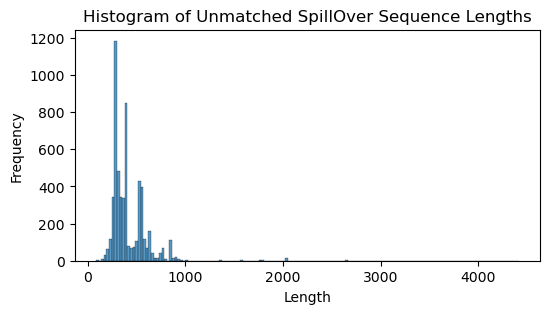

In [95]:
# Plot histogram
plt.figure(figsize=(6, 3))
sns.histplot(not_matched_gb_len['length'])
plt.title('Histogram of Unmatched SpillOver Sequence Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Assess Matches

In [ ]:
gcl = 'from-farm/spillover-x-genbank-2023-05-viral.dna-k31-sc1.fastmultigather.csv'

In [17]:
matched_gb = sp[sp['AccessionNumber'].isin(matched_accs_gb)]
matched_gb.shape

(28179, 55)

In [19]:
matched_gb.head()

,Column1,IndividualID,HostClass,HostOrder,HostFamily,HostGenus,HostSpecies,Virus,VirusSpecies,VirusGenus,...,WilsonNoDiets,ConservationStatus,TaxaGroup,HostGeography,LUS_new,LVSTD_DS,ResultPopDensity,PresenceDeforestation20,ProbUrbanExpan2030Cat,AgChangePA
0,1,NCB146845,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,2,NCB146846,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,3,NCB146847,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
5,6,NCB146850,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
6,7,NCB146851,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [22]:
gcl_csv = 'from-farm/spillover-x-genbank-2023-05-viral.dna-k31-sc1.fastmultigather.with-lineages.csv'
gcl = pd.read_csv(gcl_csv)
gcl.head()

,query_name,query_md5,match_name,match_md5,f_match_query,intersect_bp,lineage
0,FJ401844 Simian immunodeficiency virus,ded283515866642093c84c78479c6a71,GCA_003192145.1 Simian immunodeficiency virus,7f71a158ced6e82ed484d12d648f94f2,0.000709,7,Viruses;Artverviricota;Revtraviricetes;Ortervi...
1,FJ400154 Simian immunodeficiency virus,068bbc94898ad3afab2760a453b7560d,GCA_003191895.1 Simian immunodeficiency virus,4f49ceb6d8dcce29eda884f87821b859,0.000878,8,Viruses;Artverviricota;Revtraviricetes;Ortervi...
2,FJ400154 Simian immunodeficiency virus,068bbc94898ad3afab2760a453b7560d,GCA_003192145.1 Simian immunodeficiency virus,7f71a158ced6e82ed484d12d648f94f2,0.000709,7,Viruses;Artverviricota;Revtraviricetes;Ortervi...
3,FJ400154 Simian immunodeficiency virus,068bbc94898ad3afab2760a453b7560d,GCA_003191795.1 Simian immunodeficiency virus,8658bf26d0d1d7ca5416d137290e50c7,0.000219,5,Viruses;Artverviricota;Revtraviricetes;Ortervi...
4,FJ400154 Simian immunodeficiency virus,068bbc94898ad3afab2760a453b7560d,GCA_003191875.1 Simian immunodeficiency virus,1cd32a127e20db3e1e4db0df53ea5d25,0.000000,6,Viruses;Artverviricota;Revtraviricetes;Ortervi...


In [37]:
gcl = gcl.sort_values(by='intersect_bp', ascending=False)
gcl.head()

,query_name,query_md5,match_name,match_md5,f_match_query,intersect_bp,lineage
92008,LN864565 Cowpox virus,53cf669b4010ebcd16a9b1ce2af25e41,GCA_004025395.1 Cowpox virus,cfa82c859fce441e9550654903aa0716,0.999224,220122,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...
89390,HQ420895 Cowpox virus,87bcd9b2467292f80ddf368ec4409e94,GCA_023533645.1 Cowpox virus,87bcd9b2467292f80ddf368ec4409e94,1.000000,215303,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...
91988,HQ420898 Cowpox virus,ffe3f648b57b0f73acff0c15370fd4e9,GCA_023533675.1 Cowpox virus,ffe3f648b57b0f73acff0c15370fd4e9,1.000000,214653,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...
92000,KY549145 Cowpox virus,2c24c0e97d81bd71d1bb334be809701a,GCA_023531745.1 Cowpox virus,2c24c0e97d81bd71d1bb334be809701a,1.000000,214517,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...
91980,KY549149 Cowpox virus,d2addb8d315275cb24be7b6b9e0b2bf2,GCA_023531785.1 Cowpox virus,d2addb8d315275cb24be7b6b9e0b2bf2,1.000000,214285,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...


In [38]:
# merge in lengths
gcl['AccessionNumber'] = gcl['query_name'].str.split(' ', n=1, expand=True)[0]
gcl_len = pd.merge(gcl, dnaL, on='AccessionNumber', how='left')
gcl_len.head()

,query_name,query_md5,match_name,match_md5,f_match_query,intersect_bp,lineage,AccessionNumber,length
0,LN864565 Cowpox virus,53cf669b4010ebcd16a9b1ce2af25e41,GCA_004025395.1 Cowpox virus,cfa82c859fce441e9550654903aa0716,0.999224,220122,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...,LN864565,228162
1,HQ420895 Cowpox virus,87bcd9b2467292f80ddf368ec4409e94,GCA_023533645.1 Cowpox virus,87bcd9b2467292f80ddf368ec4409e94,1.000000,215303,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...,HQ420895,225136
2,HQ420898 Cowpox virus,ffe3f648b57b0f73acff0c15370fd4e9,GCA_023533675.1 Cowpox virus,ffe3f648b57b0f73acff0c15370fd4e9,1.000000,214653,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...,HQ420898,222555
3,KY549145 Cowpox virus,2c24c0e97d81bd71d1bb334be809701a,GCA_023531745.1 Cowpox virus,2c24c0e97d81bd71d1bb334be809701a,1.000000,214517,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...,KY549145,225263
4,KY549149 Cowpox virus,d2addb8d315275cb24be7b6b9e0b2bf2,GCA_023531785.1 Cowpox virus,d2addb8d315275cb24be7b6b9e0b2bf2,1.000000,214285,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...,KY549149,225395


In [61]:
gcl_len[gcl_len['f_match_query'] >=0.005]['query_name'].nunique()

20460

In [71]:
gcl_len[gcl_len['intersect_bp'] ==100].tail()

,query_name,query_md5,match_name,match_md5,f_match_query,intersect_bp,lineage,AccessionNumber
70270,HM113880 Lyssavirus rabies,8dcfaa14d484783e267f6d3b716565f6,GCA_900231175.1 Lyssavirus rabies,e32e20a1e3683b8ca4c9a8aa0ce34bd3,0.004540,100,Viruses;Negarnaviricota;Monjiviricetes;Mononeg...,HM113880
6537,KF685423 Simian foamy virus,7b92670e52a675c26efe5e91d52338d6,GCA_003032785.1 Japanese macaque simian foamy ...,d72e6e2b4c74e7d6b299473238b0999b,0.004093,100,Viruses;Artverviricota;Revtraviricetes;Ortervi...,KF685423
11395,KF685440 Simian foamy virus,7cc62bc4ca9531c0b850bd9628d2964d,GCA_003032785.1 Japanese macaque simian foamy ...,d72e6e2b4c74e7d6b299473238b0999b,0.004093,100,Viruses;Artverviricota;Revtraviricetes;Ortervi...,KF685440
84157,HM113927 Lyssavirus rabies,34f98b6d12a74ae86670901224de7f3d,GCA_900231175.1 Lyssavirus rabies,e32e20a1e3683b8ca4c9a8aa0ce34bd3,0.008407,100,Viruses;Negarnaviricota;Monjiviricetes;Mononeg...,HM113927
60240,HM114163 Lyssavirus rabies,f995265c153de81c84f8b3fe0920e2ab,GCA_900231255.1 Lyssavirus rabies,3e5774f1311f3efeb5cfcb294bfbeb27,0.008408,100,Viruses;Negarnaviricota;Monjiviricetes;Mononeg...,HM114163


### For now: Let's use first match as 'correct' species assignment for each.

In [94]:
gcl_bestmatch = gcl_len.groupby('query_name').nth(0)
gcl_bestmatch.shape

(28173, 9)

In [96]:
gcl_bestmatch.head()

,query_name,query_md5,match_name,match_md5,f_match_query,intersect_bp,lineage,AccessionNumber,length
0,LN864565 Cowpox virus,53cf669b4010ebcd16a9b1ce2af25e41,GCA_004025395.1 Cowpox virus,cfa82c859fce441e9550654903aa0716,0.999224,220122,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...,LN864565,228162
1,HQ420895 Cowpox virus,87bcd9b2467292f80ddf368ec4409e94,GCA_023533645.1 Cowpox virus,87bcd9b2467292f80ddf368ec4409e94,1.000000,215303,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...,HQ420895,225136
2,HQ420898 Cowpox virus,ffe3f648b57b0f73acff0c15370fd4e9,GCA_023533675.1 Cowpox virus,ffe3f648b57b0f73acff0c15370fd4e9,1.000000,214653,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...,HQ420898,222555
3,KY549145 Cowpox virus,2c24c0e97d81bd71d1bb334be809701a,GCA_023531745.1 Cowpox virus,2c24c0e97d81bd71d1bb334be809701a,1.000000,214517,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...,KY549145,225263
4,KY549149 Cowpox virus,d2addb8d315275cb24be7b6b9e0b2bf2,GCA_023531785.1 Cowpox virus,d2addb8d315275cb24be7b6b9e0b2bf2,1.000000,214285,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...,KY549149,225395


In [97]:
# gcl_bestmatch = gcl_len.groupby('query_name').nth(0)

gcl_bestmatch.to_csv('spillover-x-genbank-2023-05-viral.dna-k31-sc1.fastmultigather.ncbi-lineages.bestmatch.csv', index=False)

## Ok, back to assessing matchs

In [78]:
#gcl[gcl['intersect_bp'] < 10].nunique()
gcl_solid = gcl_len[gcl_len['intersect_bp'] >=100]
gcl_solid.shape

(37644, 9)

In [79]:
gcl_solid['query_name'].nunique()

20113

In [77]:
gcl_solid.tail()

,query_name,query_md5,match_name,match_md5,f_match_query,intersect_bp,lineage,AccessionNumber,length
37639,HM113880 Lyssavirus rabies,8dcfaa14d484783e267f6d3b716565f6,GCA_900231175.1 Lyssavirus rabies,e32e20a1e3683b8ca4c9a8aa0ce34bd3,0.004540,100,Viruses;Negarnaviricota;Monjiviricetes;Mononeg...,HM113880,699
37640,KF685423 Simian foamy virus,7b92670e52a675c26efe5e91d52338d6,GCA_003032785.1 Japanese macaque simian foamy ...,d72e6e2b4c74e7d6b299473238b0999b,0.004093,100,Viruses;Artverviricota;Revtraviricetes;Ortervi...,KF685423,1125
37641,KF685440 Simian foamy virus,7cc62bc4ca9531c0b850bd9628d2964d,GCA_003032785.1 Japanese macaque simian foamy ...,d72e6e2b4c74e7d6b299473238b0999b,0.004093,100,Viruses;Artverviricota;Revtraviricetes;Ortervi...,KF685440,1125
37642,HM113927 Lyssavirus rabies,34f98b6d12a74ae86670901224de7f3d,GCA_900231175.1 Lyssavirus rabies,e32e20a1e3683b8ca4c9a8aa0ce34bd3,0.008407,100,Viruses;Negarnaviricota;Monjiviricetes;Mononeg...,HM113927,699
37643,HM114163 Lyssavirus rabies,f995265c153de81c84f8b3fe0920e2ab,GCA_900231255.1 Lyssavirus rabies,3e5774f1311f3efeb5cfcb294bfbeb27,0.008408,100,Viruses;Negarnaviricota;Monjiviricetes;Mononeg...,HM114163,852


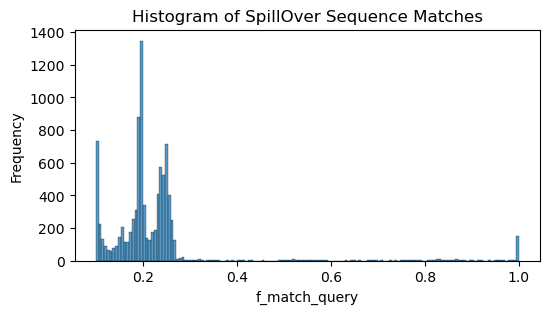

In [73]:
gcl_nongenome = gcl_solid[gcl_solid['f_match_query'] > 0.1]

plt.figure(figsize=(6, 3))
sns.histplot(gcl_nongenome['f_match_query'])#, bins=100, kde=False)
plt.title('Histogram of SpillOver Sequence Matches')
plt.xlabel('f_match_query')
plt.ylabel('Frequency')
plt.show()

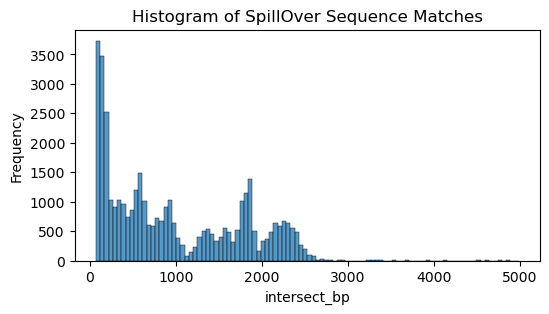

In [49]:
# Plot histogram
gcl_nongenome = gcl_solid[gcl_solid['intersect_bp'] < 5000]

plt.figure(figsize=(6, 3))
sns.histplot(gcl_nongenome['intersect_bp'], bins=100, kde=False)
plt.title('Histogram of SpillOver Sequence Matches')
plt.xlabel('intersect_bp')
plt.ylabel('Frequency')
plt.show()

In [81]:
## get first match of each of these solid ones

first_match = gcl_solid.groupby('query_name').nth(0).reset_index()
first_match.shape

(20113, 10)

In [84]:
first_match['lineage'].tolist()[:5]

['Viruses;Nucleocytoviricota;Pokkesviricetes;Chitovirales;Poxviridae;Orthopoxvirus;Cowpox virus',
 'Viruses;Nucleocytoviricota;Pokkesviricetes;Chitovirales;Poxviridae;Orthopoxvirus;Cowpox virus',
 'Viruses;Nucleocytoviricota;Pokkesviricetes;Chitovirales;Poxviridae;Orthopoxvirus;Cowpox virus',
 'Viruses;Nucleocytoviricota;Pokkesviricetes;Chitovirales;Poxviridae;Orthopoxvirus;Cowpox virus',
 'Viruses;Nucleocytoviricota;Pokkesviricetes;Chitovirales;Poxviridae;Orthopoxvirus;Cowpox virus']

In [88]:
gcl['match_name'].nunique()

888

In [91]:
gcl.head()
#gcl['GCA_ident'] = gcl['ident'].str.replace('GCF', 'GCA')

,query_name,query_md5,match_name,match_md5,f_match_query,intersect_bp,lineage,AccessionNumber
92008,LN864565 Cowpox virus,53cf669b4010ebcd16a9b1ce2af25e41,GCA_004025395.1 Cowpox virus,cfa82c859fce441e9550654903aa0716,0.999224,220122,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...,LN864565
89390,HQ420895 Cowpox virus,87bcd9b2467292f80ddf368ec4409e94,GCA_023533645.1 Cowpox virus,87bcd9b2467292f80ddf368ec4409e94,1.000000,215303,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...,HQ420895
91988,HQ420898 Cowpox virus,ffe3f648b57b0f73acff0c15370fd4e9,GCA_023533675.1 Cowpox virus,ffe3f648b57b0f73acff0c15370fd4e9,1.000000,214653,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...,HQ420898
92000,KY549145 Cowpox virus,2c24c0e97d81bd71d1bb334be809701a,GCA_023531745.1 Cowpox virus,2c24c0e97d81bd71d1bb334be809701a,1.000000,214517,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...,KY549145
91980,KY549149 Cowpox virus,d2addb8d315275cb24be7b6b9e0b2bf2,GCA_023531785.1 Cowpox virus,d2addb8d315275cb24be7b6b9e0b2bf2,1.000000,214285,Viruses;Nucleocytoviricota;Pokkesviricetes;Chi...,KY549149
